# load the hdf5 file and access the image column

In [1]:
from astropy.table import Table
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#load the data
data=Table.read(r'image_table_stars.hdf5')

In [3]:
image_column=np.array(data['image'])


In [4]:
print("type of image column:",type(image_column))
print("size of image_column:",image_column.shape)

type of image column: <class 'numpy.ndarray'>
size of image_column: (10000, 36, 36, 4)


# Visualization of images

In [5]:
data[50]

ID,RAJ2000,DECJ2000,SPECTYPE,image
bytes29,float64,float64,bytes4,"float32[36,36,4]"
KiDSDR5 J083727.019+025147.11,129.362582,2.863088,STAR,-4.1059395e-12 .. -5.720002e-12


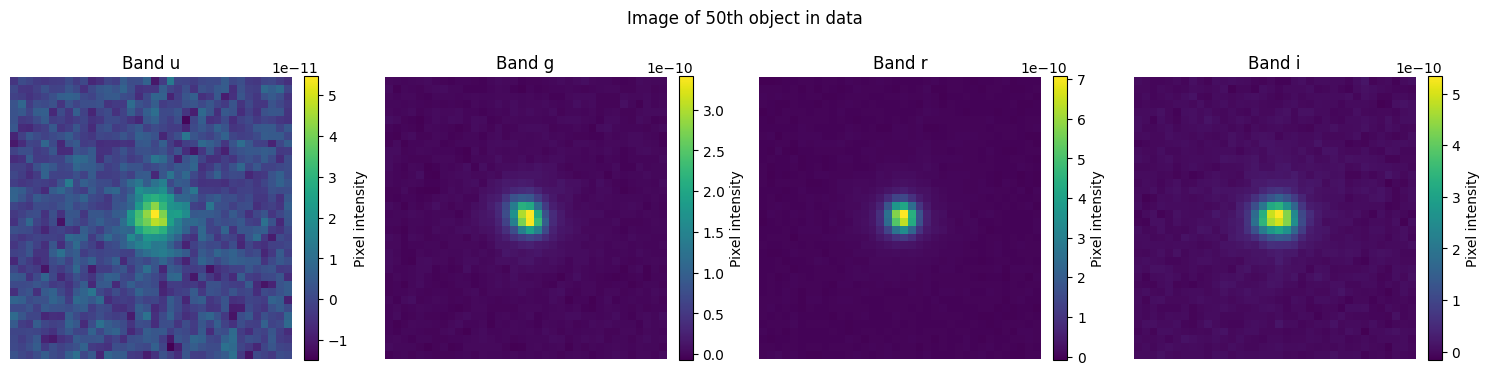

In [6]:
index = 50

fig, axes = plt.subplots(1, 4, figsize=(15, 4))  

# Titles for the bands
band_titles = ['u', 'g', 'r', 'i']

for j in range(4):
    ax = axes[j]
    image = image_column[index, :, :, j]
    im = ax.imshow(image, cmap='viridis')
    ax.set_title(f'Band {band_titles[j]}')
    ax.axis('off')
    
    cbar = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    cbar.set_label('Pixel intensity')
    
plt.suptitle("Image of 50th object in data")
plt.tight_layout()
plt.show()
plt.close()

# Visualization of more than one obejct

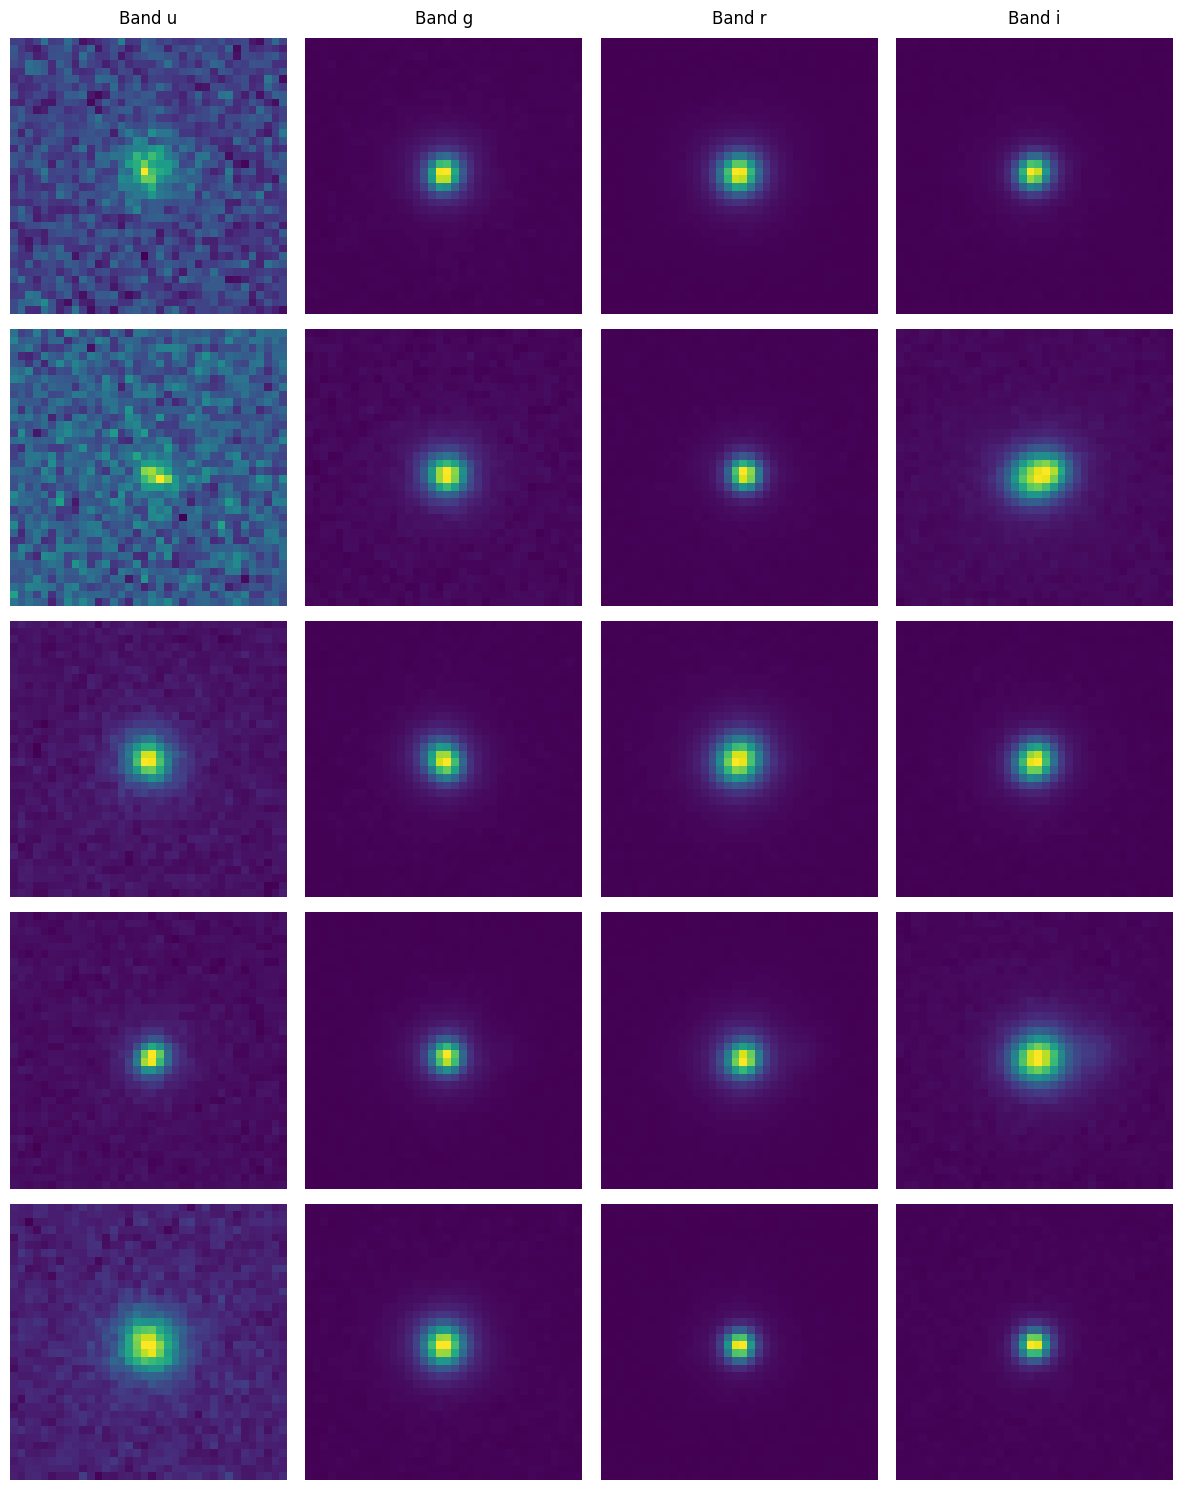

In [7]:
n_objects = 5 
band_titles = ['u', 'g', 'r', 'i']

# Create a n_objectsx4 grid (n_objects rows, 4 columns - one for each band)
fig, axes = plt.subplots(n_objects, 4, figsize=(12, 3 * n_objects))

if n_objects == 1:
    axes = axes.reshape(1, -1)

for i in range(n_objects):
    for j in range(4):
        ax = axes[i, j]
        
        image = image_column[i, :, :, j]
        im = ax.imshow(image, cmap='viridis')
        
        # Add band titles to first row only
        if i == 0:
            ax.set_title(f'Band {band_titles[j]}', pad=10)
        ax.axis('off')

plt.tight_layout()
plt.show()
plt.close()

# CNN

In [ ]:
from tensorflow import keras
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Conv3D, GlobalMaxPooling2D
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.models import Model, load_model
from tensorflow.keras import layers
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import to_categorical

import random


In [17]:
#extract the image data 
image=np.array(data['image'].reshape((-1,36,36,4)))
image=np.array(data['SPECTYPE'])

In [14]:
print(image.shape)

(10000, 36, 36, 4)


In [ ]:
# sample code to feed the image data into CNN

In [ ]:
cnn_input = Input(shape=(36,36, 4))
x = Conv2D(filters=64, kernel_size=(7, 7), strides=(1,1), padding='same', activation='relu',
                     kernel_initializer='he_normal')(cnn_input)
x = AveragePooling2D(pool_size=(3, 3), strides=(1,1), padding='same')(x)

x = Conv2D(filters=64, kernel_size=(1, 1), strides=(1, 1), padding='same', activation='relu',
                     kernel_initializer='he_normal')(x)
